In [127]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
# For Global Entrepreneurship read in file
import pyreadstat

file="/Users/adelzel/Downloads/GEM 2019 APS Global Individual Level Data_30Jan2021.sav"
df, meta = pyreadstat.read_sav(file)

In [1]:
# For web scraping
import requests
from bs4 import BeautifulSoup

# New Df

In [236]:
#initialize empty df
df = pd.DataFrame({'Job_Loc': pd.Series(dtype='str'),
                   'industry_compsize': pd.Series(dtype='str'),
                   'usetime': pd.Series(dtype='str'),
                   'score': pd.Series(dtype='float'),
                   'review_title': pd.Series(dtype='str'),
                   'review_body': pd.Series(dtype='str'),
                   'review_pro': pd.Series(dtype='str'),
                   'review_con': pd.Series(dtype='str')
                   })

In [229]:
#Check that empty df was initialized

df

,Job_Loc,industry_compsize,usetime,score,review_title,review_body,review_pro,review_con


## Start Scrape

In [315]:
#Loop through all reviews on one page of this website

#Create function to do this
def loop_through_reviews(containers,df,last_n,start_line):
    for i in range (8,last_n):
        #range starts at 8, because earlier values of container aren't reviews

        #line_i corresponds to the new row of the dataset where we will save
        line_i = i-7+start_line
        
        #The i-th container is a single user's review
        #this class gets the user descriptions
        user = containers[i].find_all('div', class_="col-lg-5 mb-3 mb-lg-0")
        
        #Getting the job and country of the user
        job_loc = user[0].find_all('div', class_="mb-2")[0]
        col1 = [ele.text.strip() for ele in job_loc]
        df.loc[line_i,'Job_Loc']= col1[0]

        #Getting the industry and company size of user
        industry_compsize = user[0].find_all('div', class_="mb-2")[1]
        col2 = [ele.text.strip() for ele in industry_compsize]
        df.loc[line_i,'industry_compsize']= col2[0]

        #Getting how long they used shopify
        usetime = user[0].find_all('div', class_="mb-2")[2]
        col3 = [ele.text.strip() for ele in usetime]
        df.loc[line_i,'usetime']= col3[0]

        #Score is the amount of stars , 5 is best 1 is worst
        score  = containers[i].find_all('span', class_="me-2")
        score = [ele.text.strip() for ele in score]
        df.loc[line_i,'score']= score[0]

        #This container is the more detailed review part.
        #If they filled it all out there are 4 parts: title, body, pro, and con
        reviews = containers[i].find_all('div', class_="col-lg-7")

        #The if clauses are debugging in case the user didn't fill something out
        review_title = reviews[0].find_all('h3')
        if review_title is not None:
            review_title = [ele.text.strip() for ele in review_title]
            if len(review_title) > 0:
                df.loc[line_i,'review_title']= review_title[0]
            else:
                continue

        review_body  = reviews[0].find('p').find('span',class_='')

        if review_body is not None:
            review_body = [ele.text.strip() for ele in review_body]
            df.loc[line_i,'review_body']= review_body[0]

            if len(reviews[0].find_all('p',class_='')) > 2:

                review_pro = reviews[0].find_all('p',class_='')[1]

                review_pro = [ele.text.strip() for ele in review_pro]
                df.loc[line_i,'review_pro']= review_pro[0]

                review_con = reviews[0].find_all('p',class_='')[2]     
                review_con = [ele.text.strip() for ele in review_con]
                df.loc[line_i,'review_con']= review_con[0]
        else:

            if len(reviews[0].find_all('p',class_='')) > 2:
                review_pro = reviews[0].find_all('p',class_='')[0]

                review_pro = [ele.text.strip() for ele in review_pro]
                df.loc[line_i,'review_pro']= review_pro[0]


                review_con = reviews[0].find_all('p',class_='')[1]
                review_con = [ele.text.strip() for ele in review_con]
                df.loc[line_i,'review_con']= review_con[0]
    
    return df

In [237]:
#First page 

# Save the URL of the webpage we want to scrape to a variable
url = 'https://www.capterra.ca/reviews/83891/shopify#facets'
# Send a get request and assign the response to a variable
response = requests.get(url)
soup = BeautifulSoup(response.content)

#
containers = soup.find_all('div', class_="container")


In [238]:
#Read in first page, check that it works
loop_through_reviews(containers,df,33,0)
df

,Job_Loc,industry_compsize,usetime,score,review_title,review_body,review_pro,review_con
1,Founder in US,"Marketing & Advertising, 2–10 Employees",Used the Software for: 2+ years,5.0,Shopify is easy to launch and manage,My overall experience has been positive using ...,I currently use Shopify for my “side hustle” b...,I don’t have any cons that I can think of with...
2,Housekeeping in US,"Hospitality, 2–10 Employees",Used the Software for: 1-5 months,4.0,To Shopify or Not to Shopify,"Inventory management, marketing, invoicing, an...","At first, it was super exciting. I was relieve...",The only issue I have with Shopify would be th...
3,Owner in US,"Retail, 2–10 Employees",Used the Software for: 1+ year,1.0,Shopify is a total scam don't deal with them.,We selected Shopify to sell our pet products f...,Not a single thing they are the worse platform...,Nothing good came about from this platform onl...
4,System Administrator in US,"Information Technology & Services, 10,000+ Emp...",Used the Software for: 2+ years,4.0,Shopify makes selling products simple,One of our offerings is sold through the Shopi...,If you're a small or large business owner look...,"Not user-friendly in terms of shipping, though..."
5,Head of Digital Marketing in India,"Information Technology & Services, 201–500 Emp...",Used the Software for: 1+ year,5.0,Accelerating Digital Growth with Shopify Websi...,I have had a great experience with Shopify web...,"Easy to Use: Shopify provides an intuitive, us...",User Interface Issues: With the exception of t...
6,Marketing Manager in India,"Information Technology & Services, 51–200 Empl...",Used the Software for: 2+ years,5.0,Best e-commerce platform that incredibly easy ...,My experience with Shopify has been excellent....,"As a Shopify user, I can attest to its ease of...",It's crucial to consider the ROI and determine...
7,"Computer Software, 2–10 Employees",Used the Software for: 2+ years,Reviewer Source,5.0,Great platform to start your ecommerce adventure,"Overall, Shopify is a top-tier platform to hos...","The ""orders"" table is very easy to navigate. E...","Though it has been improved over the years, fi..."
8,Media Buyer in Bangladesh,"Information Technology & Services, 2–10 Employees",Used the Software for: 2+ years,5.0,Best for Ecommerce store business,"Overall, I am happy with my current subscripti...","Simple to just use, excellent recommendations,...",Their prices should be lower compare to their ...
9,Software Developer in Mexico,"Computer Software, Self Employed",Used the Software for: 6-12 months,5.0,One of the best ecommerce platforms,"Overall, I think Shopify is great in one word,...",One of the things I like about Shopify is that...,One of the things I dislike about Shopify is t...
10,Software Engineer in India,"E-Learning, 501–1,000 Employees",Used the Software for: 2+ years,4.0,New way to grab Best Deals On Products - Shopify,NaN,NaN,NaN


In [338]:
#For sleeping
import time

In [ ]:
#243 total

#Change the range from 2 to 244
#try until request ==4 29, then try again in 2 seconds
for i in range(243,244):
    print(i)
    # Save the URL of the webpage we want to scrape to a variable
    url = "https://www.capterra.ca/reviews/83891/shopify?page="+str(i)
    # Send a get request and assign the response to a variable
    response = requests.get(url)
    soup = BeautifulSoup(response.content)

    containers = soup.find_all('div', class_="container")
    
    loop_through_reviews(containers,df,33,len(df))

    #Sleep to not get Too Many request message
    time.sleep(1)

df

In [389]:
response.status_code == 429

True

In [507]:
df

,Job_Loc,industry_compsize,usetime,score,review_title,review_body,review_pro,review_con
0,Founder in US,"Marketing & Advertising, 2–10 Employees",Used the Software for: 2+ years,5.0,Shopify is easy to launch and manage,My overall experience has been positive using ...,I currently use Shopify for my “side hustle” b...,I don’t have any cons that I can think of with...
1,Housekeeping in US,"Hospitality, 2–10 Employees",Used the Software for: 1-5 months,4.0,To Shopify or Not to Shopify,"Inventory management, marketing, invoicing, an...","At first, it was super exciting. I was relieve...",The only issue I have with Shopify would be th...
2,Owner in US,"Retail, 2–10 Employees",Used the Software for: 1+ year,1.0,Shopify is a total scam don't deal with them.,We selected Shopify to sell our pet products f...,Not a single thing they are the worse platform...,Nothing good came about from this platform onl...
3,System Administrator in US,"Information Technology & Services, 10,000+ Emp...",Used the Software for: 2+ years,4.0,Shopify makes selling products simple,One of our offerings is sold through the Shopi...,If you're a small or large business owner look...,"Not user-friendly in terms of shipping, though..."
4,Head of Digital Marketing in India,"Information Technology & Services, 201–500 Emp...",Used the Software for: 1+ year,5.0,Accelerating Digital Growth with Shopify Websi...,I have had a great experience with Shopify web...,"Easy to Use: Shopify provides an intuitive, us...",User Interface Issues: With the exception of t...
...,...,...,...,...,...,...,...,...
6216,"Design, 2–10 Employees",Used the Software for: Free Trial,Reviewer Source,5.0,excelente!,"La verdad mas o menos, sus estadísticas faltan...",Fácil de usar con varias herramientas disponibles,No he logrado vender hasta ahora nada con el
6217,Impiegato in Italy,"Marketing & Advertising, 51–200 Employees",Used the Software for: Free Trial,5.0,Shopify: certezza e professionalità!,NaN,NaN,NaN
6218,Analista in Brazil,"Facilities Services, Self Employed",Used the Software for: 1-5 months,4.0,Aplicativo em crescimento,fiz as consultas grande diversidade,Fácil navegação sem novidades de buscar os itens,"muitas imagens na tela, sem novidades de busca..."
6219,"Design, 2–10 Employees",Used the Software for: Free Trial,Reviewer Source,5.0,excelente!,"La verdad mas o menos, sus estadísticas faltan...",Fácil de usar con varias herramientas disponibles,No he logrado vender hasta ahora nada con el


In [508]:
#Save df to file
df.to_csv("shopify_reviews.csv",index=False)

## Clean Data

In [509]:
df[['Job', 'Loc']]   = df['Job_Loc'].str.split(' in ', 1, expand=True)

/var/folders/c3/4ztrwxxd5738jjdlmzlmdw800000gn/T/ipykernel_55837/207508295.py:1: FutureWarning: In a future version of pandas all arguments of StringMethods.split except for the argument 'pat' will be keyword-only.
  df[['Job', 'Loc']]   = df['Job_Loc'].str.split(' in ', 1, expand=True)


In [510]:
df[['industry', 'compsize']]  = df['industry_compsize'].str.split(',', 1, expand=True)

/var/folders/c3/4ztrwxxd5738jjdlmzlmdw800000gn/T/ipykernel_55837/71745414.py:1: FutureWarning: In a future version of pandas all arguments of StringMethods.split except for the argument 'pat' will be keyword-only.
  df[['industry', 'compsize']]  = df['industry_compsize'].str.split(',', 1, expand=True)


In [527]:
df['score'] = df['score'].astype(float).apply(np.floor).astype(int)

In [528]:
df['score'].value_counts()

5    4020
4    1763
3     319
2      65
1      53
Name: score, dtype: int64

In [530]:
df['compsize'].value_counts()

 2–10 Employees                                1374
 Self Employed                                 1163
 11–50 Employees                                710
 51–200 Employees                               428
 10,000+ Employees                              205
 201–500 Employees                              171
 1,001–5,000 Employees                          160
 501–1,000 Employees                            151
 5,001–10,000 Employees                          65
 Wellness & Fitness, 2–10 Employees              43
 Wellness & Fitness, Self Employed               41
 Wellness & Fitness, 11–50 Employees             16
 Wellness & Fitness, 51–200 Employees            12
 Wellness & Fitness, 501–1,000 Employees          6
 Travel & Tourism, 2–10 Employees                 6
 Wellness & Fitness, 201–500 Employees            4
 Wellness & Fitness, 10,000+ Employees            4
 Wellness & Fitness, 5,001–10,000 Employees       3
 Travel & Tourism, 51–200 Employees               3
 Travel & To

In [533]:
df['industry'].value_counts()

                                     567
Retail                               490
Marketing & Advertising              460
Apparel & Fashion                    266
Information Technology & Services    265
                                    ... 
Gambling & Casinos                     1
Public Policy                          1
Museums & Institutions                 1
Ranching                               1
Investment Banking                     1
Name: industry, Length: 145, dtype: int64

# Analyze data

In [271]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
import nltk

In [272]:
# Create list of words to exclude such as "the,on , in"

import string
print(string.punctuation)
# import the nltk stopwords
nltk.download('stopwords')
from nltk.corpus import stopwords 

stemmer = nltk.stem.PorterStemmer()
ENGLISH_STOP_WORDS = stopwords.words('english')

def my_tokenizer(sentence):
    # remove punctuation and set to lower case
    for punctuation_mark in string.punctuation:
        sentence = sentence.replace(punctuation_mark,'').lower()

    # split sentence into words
    listofwords = sentence.split(' ')
    listofstemmed_words = []
    
    # remove stopwords and any tokens that are just empty strings
    for word in listofwords:
        if (not word in ENGLISH_STOP_WORDS) and (word!=''):
            # Stem words
            stemmed_word = stemmer.stem(word)
            listofstemmed_words.append(stemmed_word)

    return listofstemmed_words

!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~


[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/adelzel/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [534]:
df2 =df[~df['review_con'].isna()]

In [535]:
tfidf = TfidfVectorizer(min_df=3,ngram_range=(3,3),tokenizer=my_tokenizer)
tfidf.fit(df2['review_con'])

/Users/adelzel/opt/anaconda3/envs/deeplearning2/lib/python3.9/site-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


TfidfVectorizer(min_df=3, ngram_range=(3, 3),
                tokenizer=<function my_tokenizer at 0x7fda7af1ab80>)

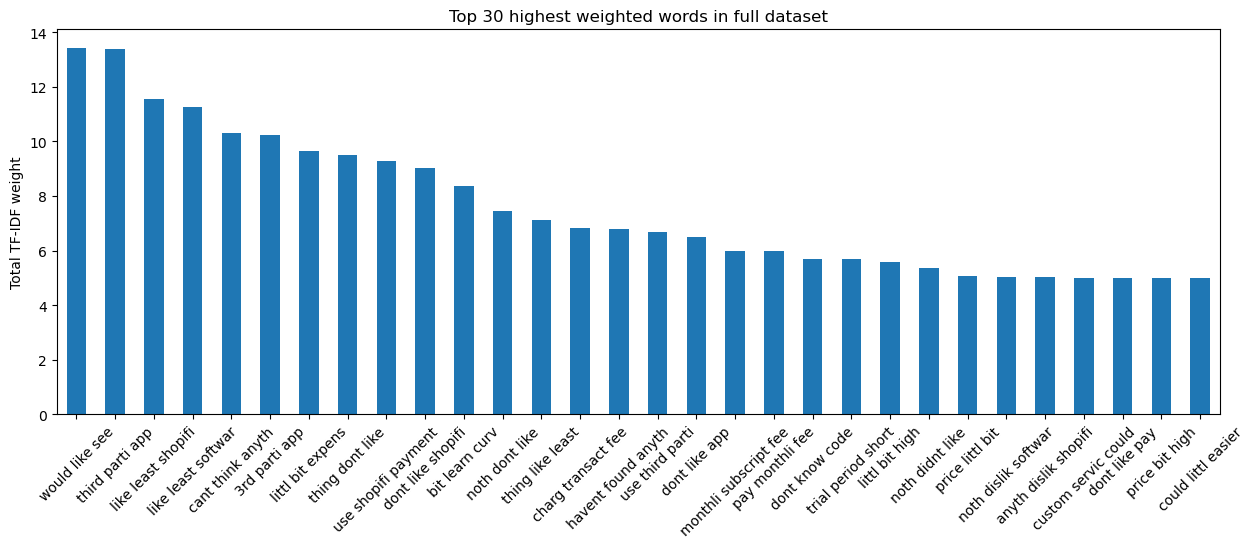

In [536]:
#Looking at TOTAL word count in ALL lyrics
word_counts = pd.DataFrame(
    {"counts": tfidf.transform(df2['review_con']).toarray().sum(axis=0)},
    index=tfidf.get_feature_names_out()

).sort_values("counts", ascending=False)

word_counts.head(30).plot(kind="bar", figsize=(15, 5), legend=False)
plt.title("Top 30 highest weighted words in full dataset")
plt.ylabel("Total TF-IDF weight")
plt.xticks(rotation=45)
plt.show()

/Users/adelzel/opt/anaconda3/envs/deeplearning2/lib/python3.9/site-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


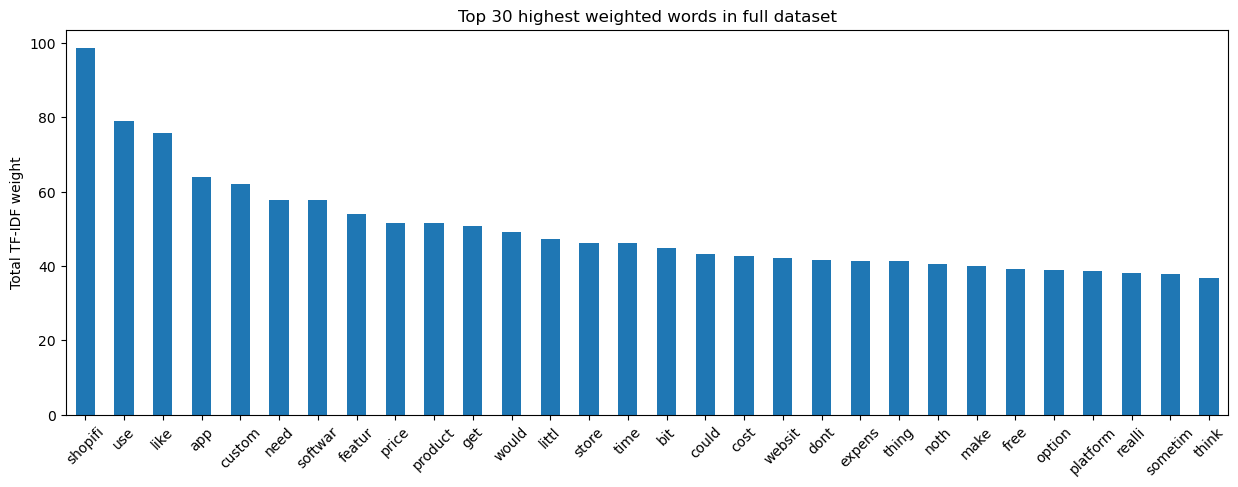

In [537]:
tfidf = TfidfVectorizer(min_df=3,ngram_range=(1,3),tokenizer=my_tokenizer)
tfidf.fit(df2['review_con'])

#Looking at TOTAL word count in ALL lyrics
word_counts = pd.DataFrame(
    {"counts": tfidf.transform(df2['review_con']).toarray().sum(axis=0)},
    index=tfidf.get_feature_names_out()

).sort_values("counts", ascending=False)

word_counts.head(30).plot(kind="bar", figsize=(15, 5), legend=False)
plt.title("Top 30 highest weighted words in full dataset")
plt.ylabel("Total TF-IDF weight")
plt.xticks(rotation=45)
plt.show()

In [286]:
df2[df2['review_con'].str.contains('theme')].to_csv('theme_stuff.csv')